# Extending recipes

## Public attributes of TreePlot
If you want to make additional plots that match or extend tree plot. You can use the coordinates that are
precomputed by `treeplot`. Specifically, some useful attributes are `tp.orderedpoints`, `tp.nodepoints`,
`tp.maxtreedepth`

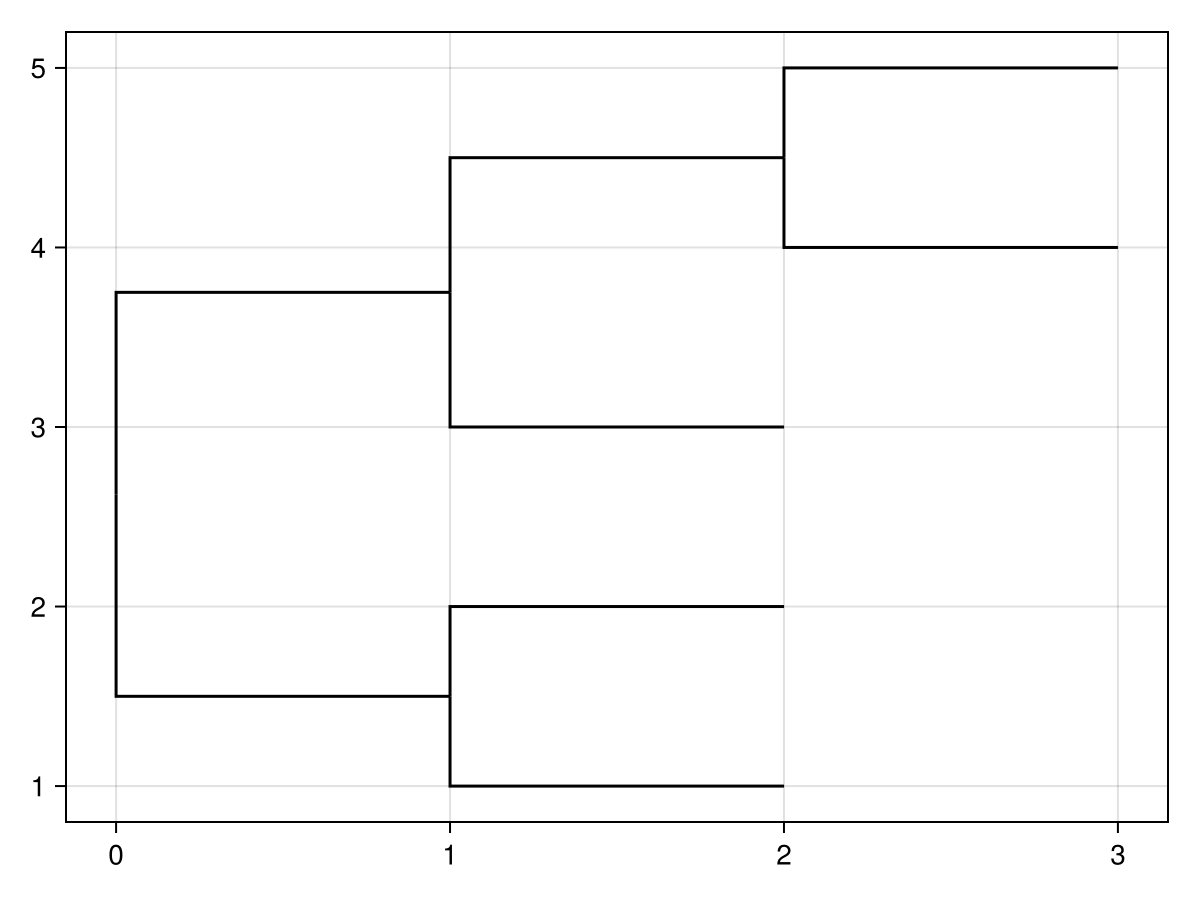

In [1]:
using CairoMakie, BasicTreePlots

tree = ((:a, :b), (:c, (:d, :e)))
fig, ax, tp = treeplot(tree)

the ordered points are returned in prewalk order i.e. like  returned by `AbstractTree.PreOrderDFS(tree)`.

In [2]:
tp.orderedpoints[]

9-element Vector{Point{2, Float32}}:
 [0.0, 2.625]
 [1.0, 1.5]
 [2.0, 1.0]
 [2.0, 2.0]
 [1.0, 3.75]
 [2.0, 3.0]
 [2.0, 4.5]
 [3.0, 4.0]
 [3.0, 5.0]

This attribute can be use directly in a lot of makie's default plotting recipes, because it is just a vector of coordinates.

The nodepoints is an `OrderedDict` of `node=>coordinate` pairs in postwalk order i.e. like returned by
`AbstractTrees.PostOrderDFS(tree)`

In [3]:
tp.nodepoints[]

OrderedCollections.OrderedDict{Any, Point{2, Float32}} with 9 entries:
  :a                         => [2.0, 1.0]
  :b                         => [2.0, 2.0]
  (:a, :b)                   => [1.0, 1.5]
  :c                         => [2.0, 3.0]
  :d                         => [3.0, 4.0]
  :e                         => [3.0, 5.0]
  (:d, :e)                   => [2.0, 4.5]
  (:c, (:d, :e))             => [1.0, 3.75]
  ((:a, :b), (:c, (:d, :e))) => [0.0, 2.625]

This attribute is harder to use directly in Makie, but is very useful when seting up further computations
on the tree. See following section.

Another useful attribute is

In [4]:
tp.maxtreedepth[]

3.0f0

Which is distance to the root of the deepest node in the tree. This can be useful when adding annotations
 outside of the tree's plotting space.

## using Makie's compute graph

To add additional compute nodes into Makie's plotting system we can use the `map!()` function like so

For example to plot markers for just the leaves of the tree.

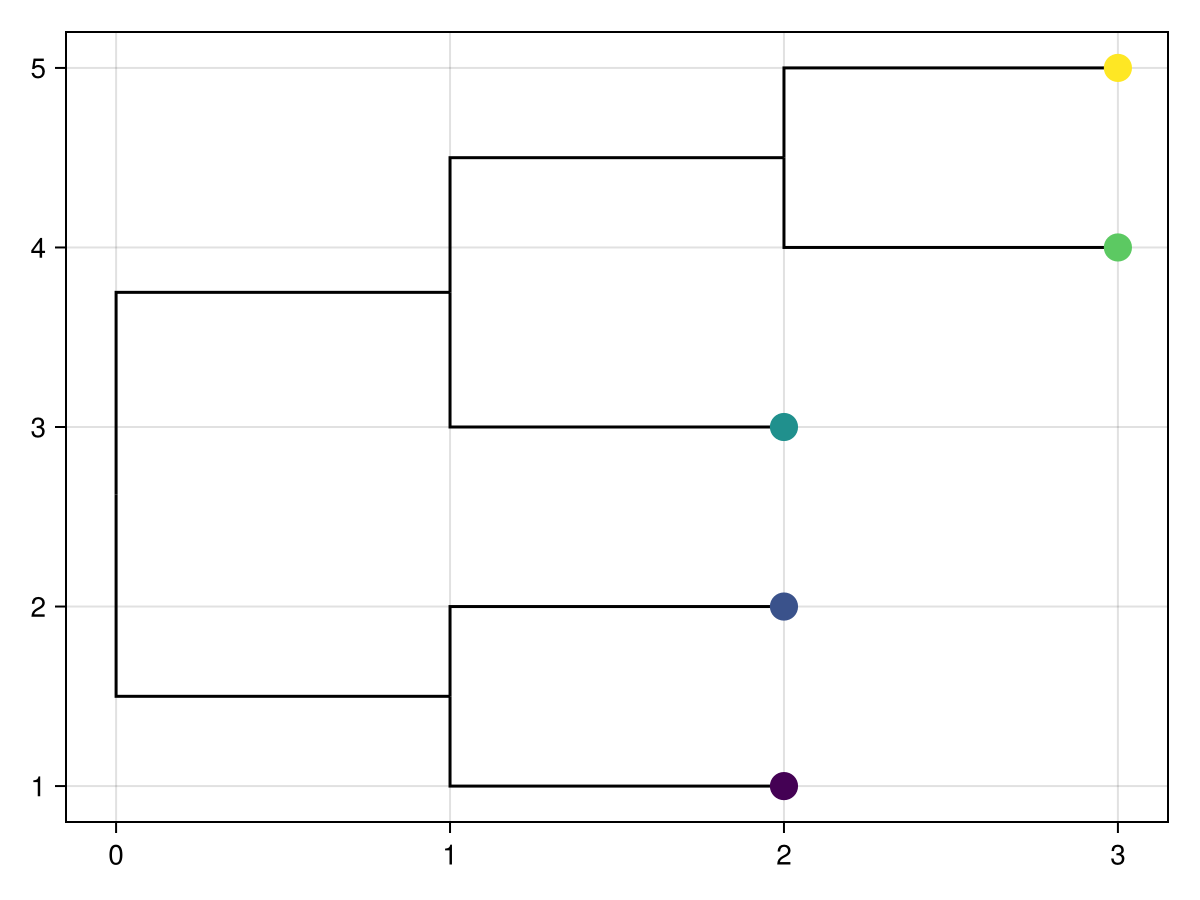

In [5]:
map!(tp.attributes, [:tree, :nodepoints], :leafcoords) do tree, nodepoints
    leafcoords = [nodepoints[node] for node in PreOrderDFS(tree) if BasicTreePlots.isleaf(node)]
    return leafcoords
end;
scatter!(tp.leafcoords; color = 1:5, markersize = 20)
fig

We can do this for all sorts of things to get the transformed features we need for additional plots.
see also [Makie's documentation](https://docs.makie.org/stable/explanations/recipes#Attribute-and-Argument-Manipulation)

This has the advantage that these features should get update automatically if the underlying tree updates,
as opposed to us needing to manually update these coordinates if we externally accessed the `tp.nodepoints[]`
variable. or the original `tree` variable.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*